## Assignment 4, Dataset 10
## Student Name: Paria Ighanian, Student ID: 0200155529


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Read the edge list from the file and create the graph
facebook_G = nx.read_edgelist('Facebook-Ego/3437_3.edges', nodetype=int)

## a. Choose one of the datasets, calculate the betweenness closeness and PageRank mentioned in the lecture on all of the nodes. Please compare the results. What cause the difference between the results?

In [13]:
# Calculate centrality measures
betweenness_centrality = nx.betweenness_centrality(facebook_G)
pagerank = nx.pagerank(facebook_G)

# Combine results into a DataFrame for comparison
import pandas as pd

centrality_df = pd.DataFrame({
    'Node': betweenness_centrality.keys(),
    'Betweenness Centrality': betweenness_centrality.values(),
    'PageRank': pagerank.values()
})


In [15]:
centrality_df.sort_values(by='Betweenness Centrality', ascending=False).reset_index(drop=True).head(10)

,Node,Betweenness Centrality,PageRank
0,3830,0.045219,0.031868
1,3782,0.037627,0.014872
2,3793,0.034110,0.020289
3,3738,0.022091,0.010870
4,3859,0.021392,0.005909
5,3836,0.020356,0.008028
6,3756,0.017498,0.013587
7,3861,0.015845,0.010764
8,3763,0.015614,0.006250
9,3851,0.014960,0.019100


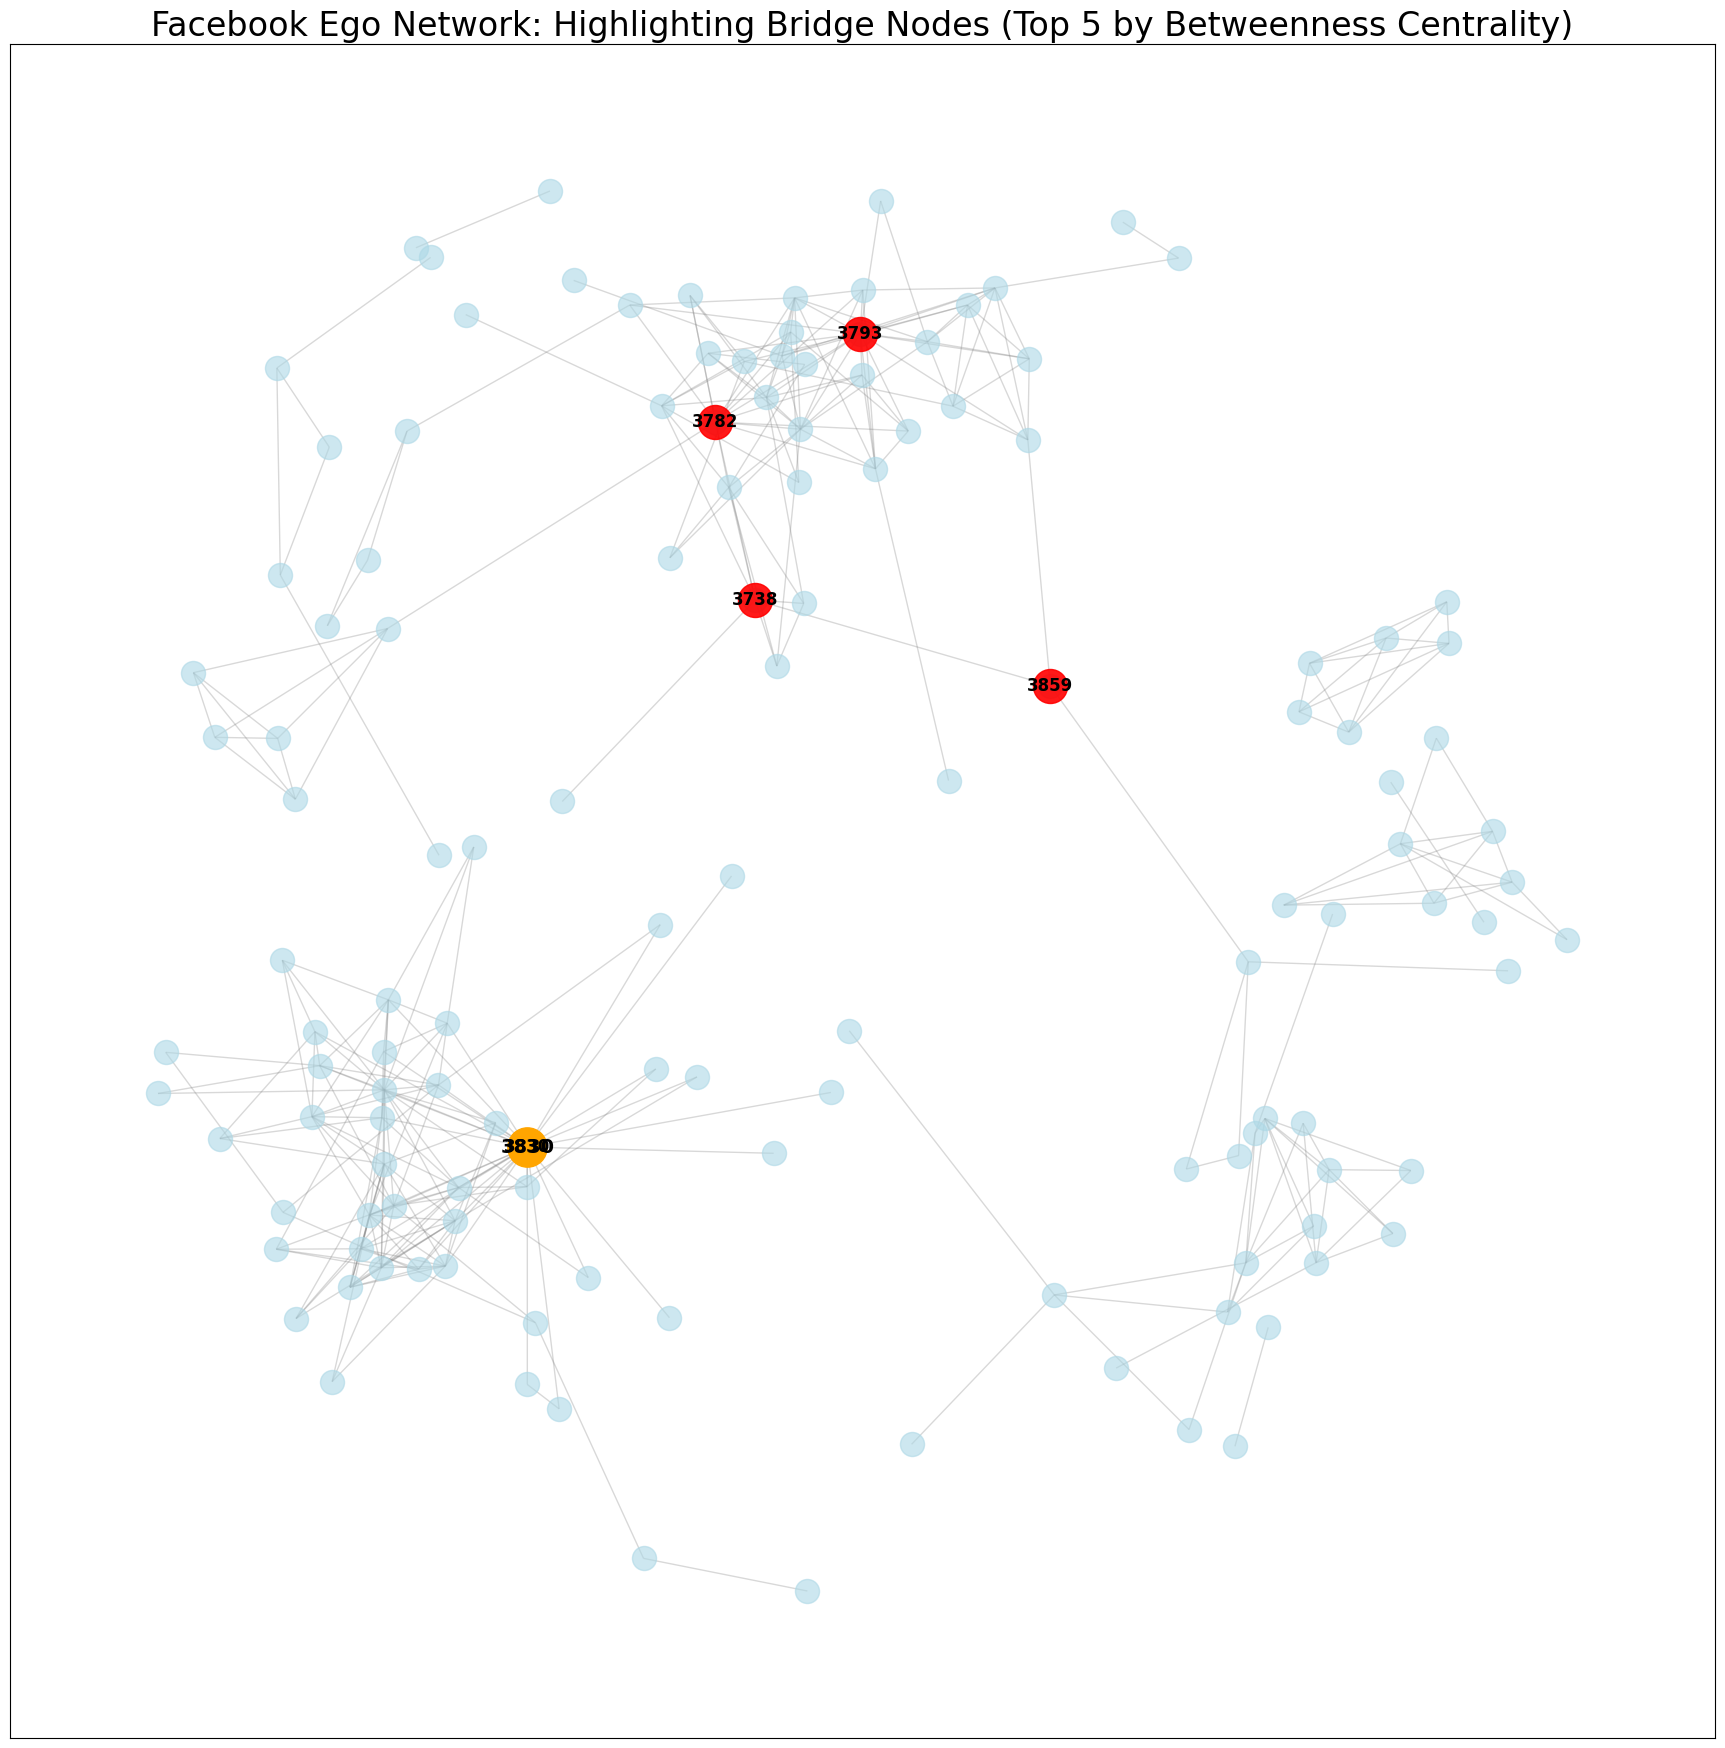

In [55]:
top_5_nodes = centrality_df.sort_values(by='Betweenness Centrality', ascending=False)['Node'].head(5).tolist()

highest_betweenness_node = centrality_df.loc[centrality_df['Betweenness Centrality'].idxmax(), 'Node']

pos = nx.spring_layout(facebook_G, k=1.5, iterations=300, seed=30)

plt.figure(figsize=(22, 22))

nx.draw_networkx_nodes(facebook_G, pos, node_color='lightblue', node_size=300, alpha=0.6)

nx.draw_networkx_nodes(facebook_G, pos, nodelist=top_5_nodes, node_color='red', node_size=600, alpha=0.9)

nx.draw_networkx_nodes(facebook_G, pos, nodelist=[highest_betweenness_node], node_color='orange', node_size=800, alpha=1)

nx.draw_networkx_edges(facebook_G, pos, edge_color='gray', alpha=0.3, width=1)

labels = {node: node for node in top_5_nodes}
nx.draw_networkx_labels(facebook_G, pos, labels, font_size=12, font_color='black', font_weight='bold')

# Add a label for the highest betweenness node
highest_label = {highest_betweenness_node: highest_betweenness_node}
nx.draw_networkx_labels(facebook_G, pos, highest_label, font_size=14, font_color='black', font_weight='bold')

plt.title('Facebook Ego Network: Highlighting Bridge Nodes (Top 5 by Betweenness Centrality)', fontsize=24)

plt.show()


In [16]:
centrality_df.sort_values(by='PageRank', ascending=False).reset_index(drop=True).head(10)

,Node,Betweenness Centrality,PageRank
0,3830,0.045219,0.031868
1,3793,0.034110,0.020289
2,3851,0.014960,0.019100
3,3758,0.014579,0.015786
4,3753,0.005324,0.015316
5,3782,0.037627,0.014872
6,3824,0.005071,0.014107
7,3756,0.017498,0.013587
8,3835,0.002953,0.012851
9,3764,0.007691,0.012535


## b. Please compare the results in (a). What cause the difference between the results?

## c. Please plot the largest strong connected component in the Twitter-Ego dataset.

## d. Choose the results of one of the two algorithms mentioned in question (a), and choose the node with the highest value and the node with lowest value. Please plot the distributions of Jaccard similarity, cosine similarity and normalized Euclidean distance between either of the two nodes and the rest of the nodes in the graph.